In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X = 6 * np.random.rand(100,1)-3
y= 0.5* X**2 + 1.5*X + np.random.randn(100,1)
#quadratic equation used:y=0.5x^2+1.5x^2+outliers

Text(0, 0.5, 'y dataset')

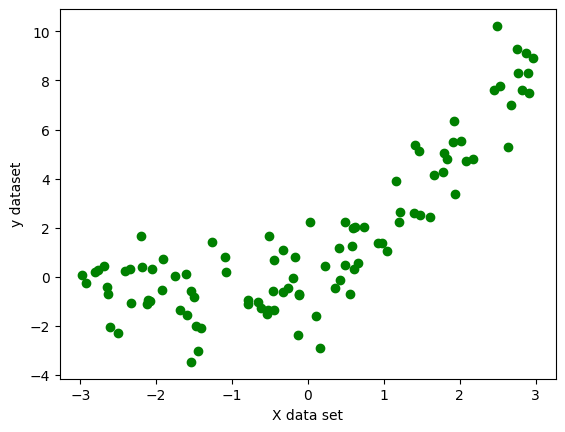

In [3]:
plt.scatter(X,y,color='g')
plt.xlabel('X data set')
plt.ylabel('y dataset')

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [5]:
# lets implement Simple Linear Regression
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [6]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg.predict(x_test))
print(score)

0.762027322054762


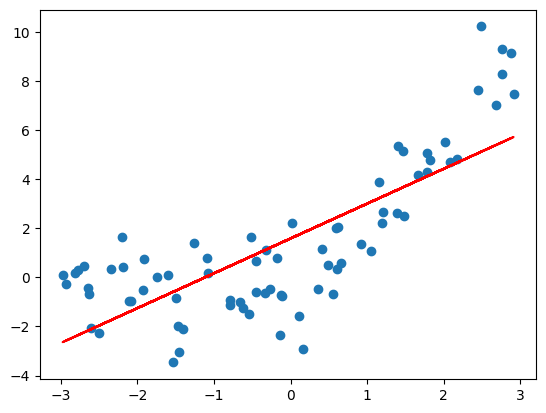

In [7]:
# viuslaizeing it
plt.plot(x_train,reg.predict(x_train),color='r')
plt.scatter(x_train,y_train)

In [8]:
#lets apply polynomial transformation
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2,include_bias=True)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [9]:
x_train_poly

array([[ 1.00000000e+00, -2.64278936e+00,  6.98433558e+00],
       [ 1.00000000e+00,  6.54502771e-01,  4.28373878e-01],
       [ 1.00000000e+00,  9.25673383e-01,  8.56871212e-01],
       [ 1.00000000e+00,  1.82644861e+00,  3.33591453e+00],
       [ 1.00000000e+00,  2.67962439e+00,  7.18038690e+00],
       [ 1.00000000e+00,  4.06553202e-01,  1.65285506e-01],
       [ 1.00000000e+00,  6.14481523e-01,  3.77587542e-01],
       [ 1.00000000e+00, -2.63516057e+00,  6.94407124e+00],
       [ 1.00000000e+00,  6.11110681e-01,  3.73456264e-01],
       [ 1.00000000e+00, -1.20611148e-01,  1.45470489e-02],
       [ 1.00000000e+00,  1.11353823e-01,  1.23996739e-02],
       [ 1.00000000e+00,  1.15544581e+00,  1.33505503e+00],
       [ 1.00000000e+00, -1.60563508e+00,  2.57806400e+00],
       [ 1.00000000e+00, -1.53915576e+00,  2.36900046e+00],
       [ 1.00000000e+00, -1.34622411e-01,  1.81231935e-02],
       [ 1.00000000e+00,  2.76254390e+00,  7.63164880e+00],
       [ 1.00000000e+00,  2.91033767e+00

In [10]:
polyreg = LinearRegression()
polyreg.fit(x_train_poly,y_train)
y_pred=polyreg.predict(x_test_poly)
score=r2_score(y_test,y_pred)
print(score)

0.9187707683290215


In [11]:
print(polyreg.coef_)
print(polyreg.intercept_)

[[0.         1.52313651 0.55302233]]
[0.00835814]


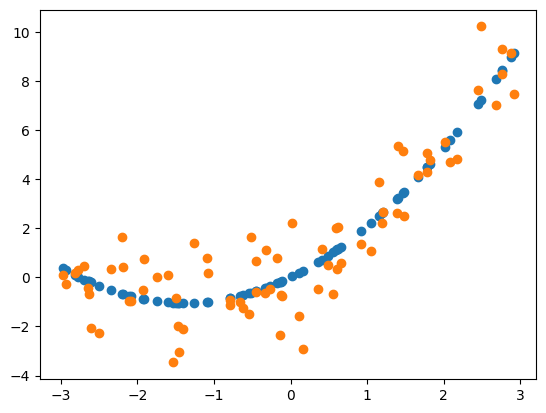

In [14]:
plt.scatter(x_train,polyreg.predict(x_train_poly))
plt.scatter(x_train,y_train)

In [15]:
poly=PolynomialFeatures(degree=3,include_bias=True)
X_train_poly=poly.fit_transform(x_train)
X_test_poly=poly.transform(x_test)

In [16]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score=r2_score(y_test,y_pred)
print(score)

0.9127188618225256


In [17]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

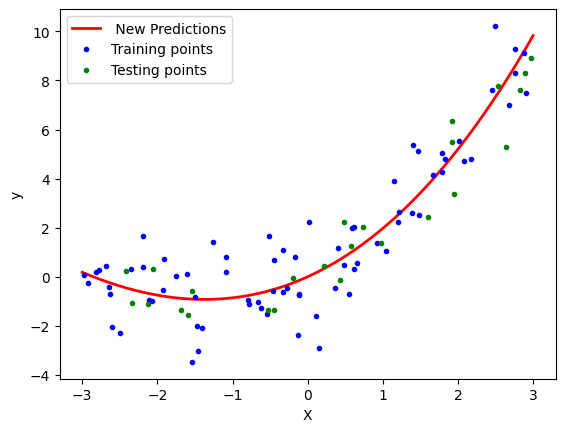

In [18]:
y_new = regression.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label=" New Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# PipLine concepts

In [19]:
from sklearn.pipeline import Pipeline

In [23]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    #passing as key value pairs for the poly_reg
    poly_regression.fit(x_train,y_train) ## ploynomial and fit of linear reression the x_train and y_train are of above only
    y_pred_new=poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()
    

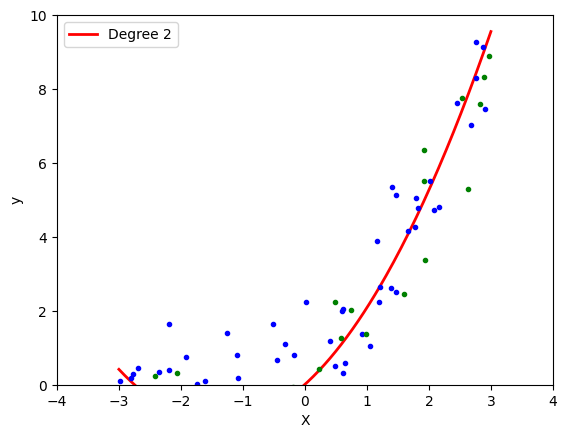

In [26]:
poly_regression(2)
#with higher degree then sometimes it ovefits the data